In [4]:
# ------------------------------mount drive-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Colab\ Notebooks/nonlinear-sys-id/pendulum\ sys\ id/results/
# !ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/nonlinear-sys-id/pendulum sys id/results


In [5]:
m = 0.1  # (kg)    mass
l = 0.5  # (m) distance between the rotor and the center of mass
ground_truth = [1 / l, 1 / m / l / l]

# Plot all LSE

308.0
390.0


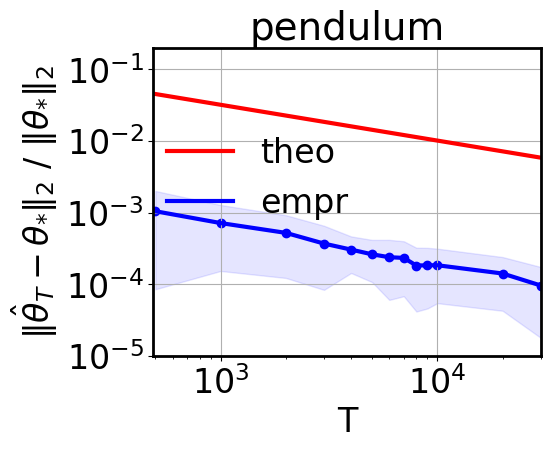

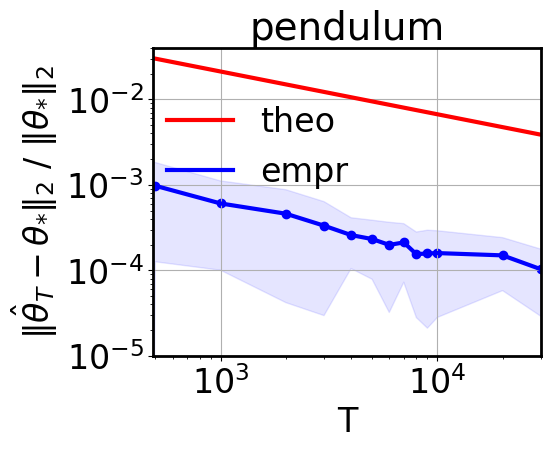

In [6]:
from re import M
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)   # fontsize of the figure title

plt.rcParams['axes.grid'] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2

normalize = True
log_scale_x = True
log_scale_y = True

if normalize:
  c_norm = np.linalg.norm(np.array(ground_truth))
else:
  c_norm = 1


colors = ['red', 'blue']

linewidth_ = 3.0
alpha_ = 0.1

time_hor_ = [1, 500]
time_hor_.extend(range(1000, 10000, 1000))
time_hor_.extend(range(10000, 100000, 10000))
time_hor_.extend([100000])

# --------------------------------------------------Uniform---------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------
s_phi = 0.0005
p_phi = 0.7
b_phi = 1e-3
w_max = 0.001
sigma_w = 0.001

fig = plt.figure(figsize=(5, 4))

name1 = 'lse_theo_bound_1_w_uniform_0.005773502691896258_s_phi_0.005_p_phi_0.85_delta_0.1.csv'
name2 = 'lse_theo_bound_2_w_uniform_0.005773502691896258_s_phi_0.005_p_phi_0.85_delta_0.1.csv'
time_list = np.loadtxt(name1, delimiter=',')
theo_bound = np.loadtxt(name2, delimiter=',')/c_norm
label1 = 'theo'
print(time_list[0])
plt.plot(time_list[:time_hor_[-1]], theo_bound[:time_hor_[-1]], color=colors[0], label=label1, linewidth=linewidth_)

name1 = 'lse_data1_w_uniform_[-1, 1]_[1, 1]_u_uniform_[-1, 1]_[1].csv'
name2 = 'lse_data2_w_uniform_[-1, 1]_[1, 1]_u_uniform_[-1, 1]_[1].csv'
time_list = time_hor_
mean_theta_hat_list = np.loadtxt(name1, delimiter=',')
std_theta_hat_list = np.loadtxt(name2, delimiter=',')
points = []
errors = []
for j in range(len(mean_theta_hat_list)):
  points.append(np.linalg.norm(mean_theta_hat_list[j]) / c_norm)
  errors.append(np.linalg.norm(std_theta_hat_list[j]) / c_norm)
label1 = 'empr'
ind = 1
plt.plot(time_list[ind:], points[ind:], color=colors[1], label=label1, linewidth=linewidth_)
plt.scatter(time_list[ind:], points[ind:], color=colors[1], marker='o')
plt.fill_between(time_list[ind:], np.array(points[ind:]) - np.array(errors[ind:]), np.array(points[ind:]) + np.array(errors[ind:]), color=colors[1], alpha=alpha_)

plt.xlim([500-10, 30000+50])
plt.ylim([5e-5, 2e-1])
if log_scale_x:
  plt.xscale('log')
if log_scale_y:
  plt.yscale('log')
plt.yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1])

plt.xlabel('T')
if normalize:
  # plt.ylabel('$\dfrac{\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}}{\|\\theta_{*}\|_{2}}$')
  plt.ylabel('$\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}\ {/} \ \|\\theta_{*}\|_{2}$')
else:
  plt.ylabel('$\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}$')

plt.title('pendulum')
plt.legend(ncol=1, loc=(0.0,0.4), framealpha=0.0)

# --------------------------------------------------Truncated Gaussian---------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------
s_phi = 0.0005
p_phi = 0.7
b_phi = 1e-3
w_max = 0.01
sigma_w = 0.001

fig = plt.figure(figsize=(5, 4))

name1 = 'lse_theo_bound_1_w_trunc_guass_0.001_s_phi_0.0005_p_phi_0.75_delta_0.1.csv'
name2 = 'lse_theo_bound_2_w_trunc_guass_0.001_s_phi_0.0005_p_phi_0.75_delta_0.1.csv'
time_list = np.loadtxt(name1, delimiter=',')
theo_bound = np.loadtxt(name2, delimiter=',')/c_norm
label1 = 'theo'
print(time_list[0])
plt.plot(time_list[:time_hor_[-1]], theo_bound[:time_hor_[-1]], color=colors[0], label=label1, linewidth=linewidth_)

name1 = 'lse_data1_w_trunc_guass_[0.0, 0.1, 10]_[1, 1]_u_trunc_guass_[0.0, 0.1, 10]_[1].csv'
name2 = 'lse_data2_w_trunc_guass_[0.0, 0.1, 10]_[1, 1]_u_trunc_guass_[0.0, 0.1, 10]_[1].csv'
time_list = time_hor_
mean_theta_hat_list = np.loadtxt(name1, delimiter=',')
std_theta_hat_list = np.loadtxt(name2, delimiter=',')
points = []
errors = []
for j in range(len(mean_theta_hat_list)):
  points.append(np.linalg.norm(mean_theta_hat_list[j]) / c_norm)
  errors.append(np.linalg.norm(std_theta_hat_list[j]) / c_norm)
label1 = 'empr'
ind = 0
plt.plot(time_list[ind:], points[ind:], color=colors[1], label=label1, linewidth=linewidth_)
plt.scatter(time_list[ind:], points[ind:], color=colors[1], marker='o')
plt.fill_between(time_list[ind:], np.array(points[ind:]) - np.array(errors[ind:]), np.array(points[ind:]) + np.array(errors[ind:]), color=colors[1], alpha=alpha_)

plt.xlim([500-10, 30000+50])
plt.ylim([5e-5, 4e-2])
if log_scale_x:
  plt.xscale('log')
if log_scale_y:
  plt.yscale('log')
plt.yticks([1e-5, 1e-4, 1e-3, 1e-2])

plt.xlabel('T')
if normalize:
  # plt.ylabel('$\dfrac{\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}}{\|\\theta_{*}\|_{2}}$')
  plt.ylabel('$\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}\ {/} \ \|\\theta_{*}\|_{2}$')
else:
  plt.ylabel('$\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}$')

# plt.legend()
plt.title('pendulum')
plt.legend(ncol=1, loc=(0.0,0.5), framealpha=0.0)


plt.show()

plot all SME

465.0
411.0


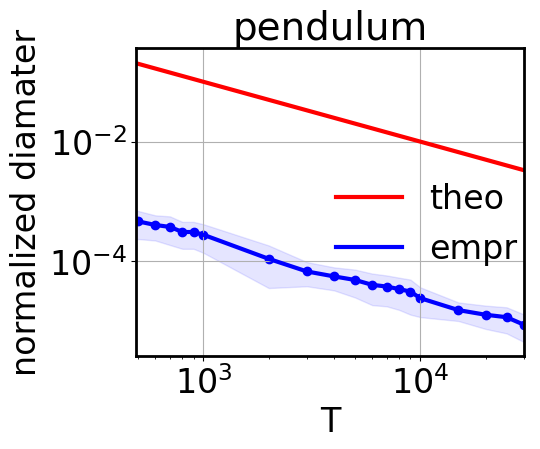

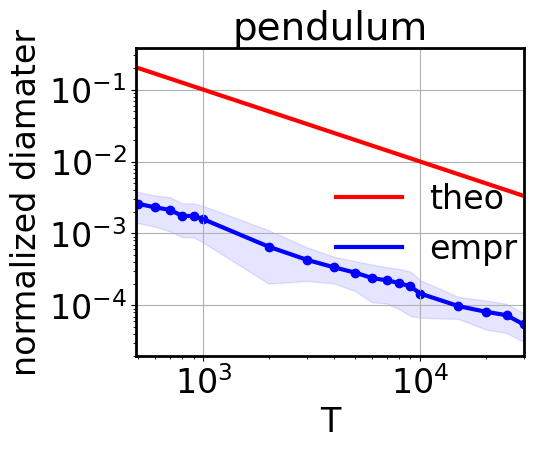

In [7]:
from re import M
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)   # fontsize of the figure title

plt.rcParams['axes.grid'] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2

normalize = True
log_scale_x = True
log_scale_y = True

if normalize:
  c_norm = np.linalg.norm(np.array(ground_truth))
else:
  c_norm = 1

time_hor = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900]
time_hor.extend([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
time_hor.extend([10000, 15000, 20000, 25000, 30000])


colors = ['red', 'blue']

linewidth_ = 3.0
alpha_ = 0.1


# --------------------------------------------------Uniform---------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------
s_phi = 0.05 # estimated
p_phi = 0.8 # estimated
b_phi = 5 # estimated
w_max = 0.01

fig = plt.figure(figsize=(5, 4))

name1 = 'sme_theo_bound_1_w_uniform__0.005773502691896258_s_phi_0.005_p_phi_0.85_eps_0.1.csv'
name2 = 'sme_theo_bound_2_w_uniform__0.005773502691896258_s_phi_0.005_p_phi_0.85_eps_0.1.csv'
time_list = np.loadtxt(name1, delimiter=',')
theo_bound = np.loadtxt(name2, delimiter=',')/c_norm
label1 = 'theo'
print(time_list[0])
plt.plot(time_list, theo_bound, color=colors[0], label=label1, linewidth=linewidth_)

name1 = 'sme_data1_w_uniform_[-1, 1]_[1, 1]_u_uniform_[-1, 1]_[1].csv'
name2 = 'sme_data2_w_uniform_[-1, 1]_[1, 1]_u_uniform_[-1, 1]_[1].csv'
time_list = time_hor
mean_theta_hat_list = np.loadtxt(name1, delimiter=',')
std_theta_hat_list = np.loadtxt(name2, delimiter=',')
points = []
errors = []
for j in range(len(mean_theta_hat_list)):
  points.append(np.linalg.norm(mean_theta_hat_list[j]) / c_norm)
  errors.append(np.linalg.norm(std_theta_hat_list[j]) / c_norm)
label1 = 'empr'
ind = 1
plt.plot(time_list[ind:], points[ind:], color=colors[1], label=label1, linewidth=linewidth_)
plt.scatter(time_list[ind:], points[ind:], color=colors[1], marker='o')
plt.fill_between(time_list[ind:], np.array(points[ind:]) - np.array(errors[ind:]), np.array(points[ind:]) + np.array(errors[ind:]), color=colors[1], alpha=alpha_)

plt.xlim([500-10, 30000+10])
# plt.ylim([9e-6, 1e-2])
if log_scale_x:
  plt.xscale('log')
if log_scale_y:
  plt.yscale('log')
# plt.yticks([1e-4, 1e-3, 1e-2])

plt.xlabel('T')
if normalize:
  # plt.ylabel('$\dfrac{\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}}{\|\\theta_{*}\|_{2}}$')
  plt.ylabel('normalized diamater')
else:
  plt.ylabel('diameter')

# plt.legend()
plt.title('pendulum')
plt.legend(ncol=1, loc=(0.48, 0.25), framealpha=0.0)

# --------------------------------------------------Truncated Gaussian---------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------
s_phi = 0.05 # estimated
p_phi = 0.95 # estimated
b_phi = 2 # estimated
w_max = 0.01
sigma_w = 0.005

fig = plt.figure(figsize=(5, 4))

name1 = 'sme_theo_bound_1_w_trunc__0.005_s_phi_0.004_p_phi_0.9_eps_0.1.csv'
name2 = 'sme_theo_bound_2_w_trunc__0.005_s_phi_0.004_p_phi_0.9_eps_0.1.csv'
time_list = np.loadtxt(name1, delimiter=',')
theo_bound = np.loadtxt(name2, delimiter=',')/c_norm
label1 = 'theo'
print(time_list[0])
plt.plot(time_list, theo_bound, color=colors[0], label=label1, linewidth=linewidth_)

name1 = 'sme_data1_w_trunc_guass_[0.0, 0.5, 2]_[1, 1]_u_trunc_guass_[0.0, 0.5, 2]_[1].csv'
name2 = 'sme_data2_w_trunc_guass_[0.0, 0.5, 2]_[1, 1]_u_trunc_guass_[0.0, 0.5, 2]_[1].csv'
time_list = time_hor
mean_theta_hat_list = np.loadtxt(name1, delimiter=',')
std_theta_hat_list = np.loadtxt(name2, delimiter=',')
points = []
errors = []
for j in range(len(mean_theta_hat_list)):
  points.append(np.linalg.norm(mean_theta_hat_list[j]) / c_norm)
  errors.append(np.linalg.norm(std_theta_hat_list[j]) / c_norm)
label1 = 'empr'
ind = 1
plt.plot(time_list[ind:], points[ind:], color=colors[1], label=label1, linewidth=linewidth_)
plt.scatter(time_list[ind:], points[ind:], color=colors[1], marker='o')
plt.fill_between(time_list[ind:], np.array(points[ind:]) - np.array(errors[ind:]), np.array(points[ind:]) + np.array(errors[ind:]), color=colors[1], alpha=alpha_)

plt.xlim([500-10, 30000+10])
# plt.ylim([1e-3, 1e-1])
if log_scale_x:
  plt.xscale('log')
if log_scale_y:
  plt.yscale('log')
# plt.yticks([1e-4, 1e-3, 1e-2])

plt.xlabel('T')
if normalize:
  # plt.ylabel('$\dfrac{\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}}{\|\\theta_{*}\|_{2}}$')
  plt.ylabel('normalized diamater')
else:
  plt.ylabel('diameter')

# plt.legend()
plt.title('pendulum')
plt.legend(ncol=1, loc=(0.48, 0.25), framealpha=0.0)


plt.show()